<h2>Final Project: An Explatory Analysis on Split Ticket Voting in the 2016 U.S. Presidential Eleciton</h2>

Emilee Daniel
<br>CSI 294: Data Science, F'20
<br>Dr. Wilson
<br>12/09/20

<h3>Data Sources</h3>
<ul>
    <li>https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/PSKDUJ</li>
    <li>https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/LYWX3D</li>
    <li>https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/NLTQAD</li>
    <li>https://www.dailykos.com/stories/2014/8/20/1323254/-New-Spreadsheet-with-1828-2012-Presidential-Results-PVI-by-State-Neatly-Colored</li>
    <li>https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt</li>
</ul>
    
<h3>Coding Sources</h3>
<ul>
    <li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html</li>
    <li>https://www.kite.com/python/answers/how-to-select-rows-by-multiple-label-conditions-with-pandas-loc-in-python</li>
    <li>https://stackoverflow.com/questions/42885332/uncomfortable-output-of-mode-in-pandas-dataframe</li>
    <li>https://stackoverflow.com/questions/42739327/iloc-giving-indexerror-single-positional-indexer-is-out-of-bounds</li>
    <li>https://stackoverflow.com/questions/20076195/what-is-the-most-efficient-way-of-counting-occurrences-in-pandas</li>
    <li>https://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe</li>
    <li>https://realpython.com/python-csv/#writing-csv-files-with-pandas</li>
    <li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html</li>
    <li>https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/</li>
    <li>https://codereview.stackexchange.com/questions/185389/dropping-rows-from-a-pandas-dataframe-where-some-of-the-columns-have-value-0/185390</li>
    <li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html</li>
    <li>https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html</li>
    <li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html</li>
    <li>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html</li>
    <li>https://stackoverflow.com/questions/16729574/how-to-get-a-value-from-a-cell-of-a-dataframe</li>
    <li>https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python</li>
    <li>https://seaborn.pydata.org/generated/seaborn.barplot.html</li>
    <li>https://stackoverflow.com/questions/39689352/plotting-bar-plot-in-seaborn-python-with-rotated-xlabels</li>
    <li>https://www.kite.com/python/answers/how-to-create-an-empty-pandas-dataframe-and-fill-it-in-python</li>
    <li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html</li>
    <li>https://stackoverflow.com/questions/31186019/rotate-tick-labels-in-subplot-pyplot-matplotlib-gridspec</li>
    
    

<h1>What is split ticket voting?</h1>
<p>Split ticket voting is when a voter votes for candidates from different political parties for different offices, on the same ballot. (https://www.ncsl.org/research/about-state-legislatures/partisan-composition.aspx#) Eventhough affiliation with a political party is a strong indicator of which candidate Americans will cast their vote for in an election, there are also some reasons why a voter may decide to split their vote between the two parties. First, they many care deeply about an issue, like the environment, and prefer to vote with the Green Party candidate as opposed to the Democratic candidate. Second, a voter may not like the personality or communication style of the candidate that their political party nominated. Third, they may be familiar or otherwise friends with a candidate running for a different party. There are many other reasons why someone may decided to split their ticket.</p>

<h1>But how often do Americans actualy split their vote at the national level?</h1>
<p>This is a great question that I will not attempt to fully answer in this explatory analysis, but we will look at a series of questions having to do with split ticket voting during the 2016 presidential election. Due to the complexity of races and names of offices at the state and local level, I will only be comparing votes cast in favor of republicans and democrats in the U.S. Presidential, Senate, and House of Representatives elections.</p>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

%matplotlib inline

<h1>The Data</h1>
<p>There are three main sets of data. First, the MIT Election Lab has made precinct-level vote returns avaliable from most states for the 2016 Presidential, Senate, and House elections. Second, I had originally planed to also look at how past partisian leaning of a state correlated with split ticket voting in that region, but I ran out of time. That is why the Cook Partisian Voting Index spreadsheet has been included. Finally, I found that I needed an easy mapping technique to go between state names and their FIPS codes as assigned by the Census Bureau. I created the "fipsDictionary.csv" spreadsheet, but the data within it was gathered from the FCC. </p>

In [2]:
presPrec = pd.read_csv("2016-precinct-president.csv", encoding='ISO-8859-1')
senaPrec = pd.read_csv("2016-precinct-senate.csv", encoding='ISO-8859-1')
housPrec = pd.read_csv("2016-precinct-house.csv", encoding='ISO-8859-1')
cookPVI = pd.read_csv("stFIPSpvi.csv")
stateCodes = pd.read_csv("fipsDictionary.csv")

/opt/miniconda2/envs/DataSci/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (13,17,19,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/miniconda2/envs/DataSci/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (13,19,27,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/miniconda2/envs/DataSci/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<h1>How I determined what was a split ticket:</h1>
<p>When it came time to count all of the split tickets, I ran into some questions and road blocks. First, the MIT data does not detail every ballot cast, instead it is an aggregation of the votes that each candidate in each race recieved in each precinct. Second, I realized that it was going to take a long time to loop through all voting precincts in each state. I decided that it would be more time efficient and still geographically specific enough to tally the vote totals within each county. Third, not all precincts reported only the party-endorsed candidate or even spelled the names of top candidates consistently. Because of this and the fact that I am simply looking at split tickets through a partisian lense, I decided to tally the votes that each party's candidates recieved. This means that a five votes for Ted Cruz in the U.S. Presidential election were counted as a part of the Republican vote totals.</p>
<p>Next, I needed to decide how to determine "how split" a county's votes were. I would ideally look at party registration records in each county to see how many members each party has there, but I stuck with only the election data. I decided to look at split tickets by each race, relevant to the Presidency. This means that I compared the number of votes that the Republican presidential candidates and U.S. Senate candidates recieved in each county. The same comparison was made with the presidential candidates and the U.S. House candidates. It was also reapeated on for the Democratic side.</p>
<p>My next question was how to store the "vote splits" for each county in each state. I settled on writing the data to a CSV file as it is easier to write to than a DataFrame. I would also be able to use it easily later in the project. The CSv file was called "splitTicketByCounty.csv" and contained the following colums:
    <ul>
        <li><b>state_fips</b>: the FIPS code assigned to the state</li>
        <li><b>county_name</b>: the name of the county within the state</li>
        <li><b>totalPresidentialVotes</b>: the total number of votes cast for president within that county, this number is later used to scale data so that counties of differing sizes could be compared to eachother</li>
        <li><b>votesForRepPres</b>: the total number of votes that all Republican presidential candidates recieved within that county</li>
        <li><b>votesForDemPres</b>: the total number of votes that all Democratic presidential candidates recieved within that county</li>
        <li><b>votesForRepSenate</b>: the total number of votes that all Republican candidates for U.S. Senate recieved within that county</li>
        <li><b>votesForDemSenate</b>: the total number of votes that all Democratic candidates for U.S. Senate recieved within that county</li>
        <li><b>votesForRepHouse</b>: the total number of votes that all Republican candidates for U.S. House recieved within that county</li>
        <li><b>votesForDemHouse</b>: the total number of votes that all Democratic candidates for U.S. House recieved within that county</li>
        <li><b>DiffRepPresSenate</b>: the difference between the total votes that Republican presidential candidates and Republican senatorial candidates recieved within a county, negative values show that the senatorial candidates recieved more votes than the presidential ones</li>
        <li><b>pDiffRepPresSenate</b>: proportion of total votes cast for president that were made up by voters who split their ticket based on Republican presidnetal candidates, achieved by (votesForRepPres - votesForRepSenate) / totalPresidentialVotes</li>
        <li><b>DiffDemPresSenate</b>: same as above but for Democratic candidates</li>
        <li><b>pDiffDemPresSenate</b>: same as above but for Democratic candidates</li>
        <li><b>DiffRepPresHouse</b>: same as above but for Republican House candidates</li>
        <li><b>pDiffRepPresHouse</b>: same as above but for Republican House candidates</li>
        <li><b>2016PartisianLean</b>: this was a part of the Cook PVI analysis and served as a "0" Republican or "1" Democratic lean</li>
        <li><b>2016LeadStrength</b>: this was a measured of how strongly partisian each state was, as reported by the Cook Institute</li>
        </ul>
        

In [3]:
with open('splitTicketByCounty.csv', mode='a') as f:
    f_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    f_writer.writerow(['state_fips', 'county_name', 'totalPresidentialVotes', 'votesForRepPres', 'votesForDemPres', 'votesForRepSenate', 'votesForDemSenate', 'votesForRepHouse', 'votesForDemHouse', 'DiffRepPresSenate', 'pDiffRepPresSenate', 'DiffDemPresSenate', 'pDiffDemPresSeante', 'DiffRepPresHouse', 'pDiffRepPresHouse', 'DiffDemPresHouse', 'pDiffDemHouse', '2016PartisianLean', "2016LeanStrength"])
    states = cookPVI["FIPS"].unique()
    
    for fips in states:
        
        counties = presPrec.loc[(presPrec['state_fips'] == fips)]['county_name'].unique()
        pviLean = cookPVI.loc[cookPVI["FIPS"] == fips]["PVIL"]
        pviStrength = cookPVI.loc[cookPVI["FIPS"] == fips] ["PVIS"]
        for county in counties:

            #Narrowing databases down to county
            presCounty = presPrec.loc[(presPrec['state_fips'] == fips) & (presPrec['county_name'] == county)]
            senaCounty = senaPrec.loc[(senaPrec['state_fips'] == fips) & (senaPrec['county_name'] == county)]
            housCounty = housPrec.loc[(housPrec['state_fips'] == fips) & (housPrec['county_name'] == county)]

            #Determing votes per party per race
            totalPresVotes = presCounty["votes"].sum()
            
            repPres = presCounty.loc[(presCounty['party'] == 'republican')]["votes"].sum()
            demPres = presCounty.loc[(presCounty['party'] == 'democratic')]["votes"].sum()

            repSena = senaCounty.loc[(senaCounty['party'] == 'republican')]["votes"].sum()
            demSena = senaCounty.loc[(senaCounty['party'] == 'democratic')]["votes"].sum()

            repHous = housCounty.loc[(housCounty['party'] == 'republican')]["votes"].sum()
            demHous = housCounty.loc[(housCounty['party'] == 'democratic')]["votes"].sum()
            

            f_writer.writerow([fips, county, totalPresVotes, repPres, demPres, repSena, demSena, repHous, demHous, (repPres - repSena), ((repPres - repSena)/totalPresVotes), (demPres - demSena), ((demPres - demSena)/totalPresVotes), (repPres - repHous), ((repPres - repHous)/totalPresVotes), (demPres - demHous), ((demPres - demHous)/totalPresVotes), pviLean, pviStrength])
f.close() 

<ipython-input-3-2e23e154f0bf>:32: RuntimeWarning: invalid value encountered in long_scalars
  f_writer.writerow([fips, county, totalPresVotes, repPres, demPres, repSena, demSena, repHous, demHous, (repPres - repSena), ((repPres - repSena)/totalPresVotes), (demPres - demSena), ((demPres - demSena)/totalPresVotes), (repPres - repHous), ((repPres - repHous)/totalPresVotes), (demPres - demHous), ((demPres - demHous)/totalPresVotes), pviLean, pviStrength])
<ipython-input-3-2e23e154f0bf>:32: RuntimeWarning: invalid value encountered in long_scalars
  f_writer.writerow([fips, county, totalPresVotes, repPres, demPres, repSena, demSena, repHous, demHous, (repPres - repSena), ((repPres - repSena)/totalPresVotes), (demPres - demSena), ((demPres - demSena)/totalPresVotes), (repPres - repHous), ((repPres - repHous)/totalPresVotes), (demPres - demHous), ((demPres - demHous)/totalPresVotes), pviLean, pviStrength])
<ipython-input-3-2e23e154f0bf>:32: RuntimeWarning: invalid value encountered in long_s

<h1>Utilizing the Data</h1>
<p>Next, I read back in the spreadsheet created. I then dropped all NaN values and looked to see how the shape was affected. Luckily, only 7 lines were dropped. The main cluprate for these NaNs was Alaska who seems to report vote returns without county destinctions. It is also important to note that certain states, such as Georgia and Mississippi did not considently report the political affiliation of each candidate either in the "party" or "candidate_party" column of the MIT datasets.</p>

In [11]:
sT = pd.read_csv("splitTicketByCountyCOPY.csv")
print("Before dropping NaNs: " + str(sT.shape))
spTicket = sT.dropna(how='any')
print("After dropping NaNs: " + str(spTicket.shape))

Before dropping NaNs: (3117, 19)
After dropping NaNs: (3110, 19)


<h1>Looking at trends! Explatory Analysis! Excitement!</h1>
<p>There were three main questions that I wanted to answer with this project:
    <ol>
        <li>How prominent was split ticket voting in 2016?</li>
        <li>If split ticket voting was common, in which level of races did voters most often break with their “majority” party?</li>
        <li>Was it more common for counties who voted for majority republicans to split for a democrat candidate? Or was it more common for precinct who voted for majority democrats to split for a republican candidate? Which partisian leaning voter is less loyal to their party?</li>
      </ol>
   </p>
   
<h1>How prominent was split ticket voting in 2016?</h1>
<p> To answer the first question I wanted to find out the average proportion of Republican and Democratic splits amoung the whole country. I found that for 3/4 scenarios, the average amount of split tickets for a county was around 2.55% of total votes cast for the presidency. However, the average split among voters who voted for a Democratic presidential candidate and a Republican senatorial candidate was over 8% of the total votes casts for the presidency! That is quite an interesting finding. It may also help explain why <a href="https://en.wikipedia.org/wiki/2016_United_States_presidential_election">Hillary Clinton</a>, the official candidate nominated by the Democratic Party in 2016, won the popular vote eventhough <a href='https://en.wikipedia.org/wiki/2016_United_States_Senate_elections'>Republicans maintained control</a> of the U.S. Senate. 

In [12]:
averageRPresDSenateSplit = spTicket["pDiffRepPresSenate"].mean()
print("Average proportion of voters in each U.S. county that \n voted for a Republican president and Democratic senator: " + str(averageRPresDSenateSplit))

averageDPresRSenateSplit = spTicket["pDiffDemPresSeante"].mean()
print("\nAverage proportion of voters in each U.S. county that \n voted for a Democratic president and Republican senator: " + str(averageDPresRSenateSplit))

averageRPresDHouseSplit = spTicket["pDiffRepPresHouse"].mean()
print("\nAverage proportion of voters in each U.S. county that \n voted for a Republican president and Democratic representative: " + str(averageRPresDHouseSplit))

averageDPresRHouseSplit = spTicket["pDiffDemHouse"].mean()
print("\nAverage proportion of voters in each U.S. county that \n voted for a Democratic president and Republican representative: " + str(averageDPresRHouseSplit))

Average proportion of voters in each U.S. county that 
 voted for a Republican president and Democratic senator: 0.24647033271800645

Average proportion of voters in each U.S. county that 
 voted for a Democratic president and Republican senator: 0.08216697561511253

Average proportion of voters in each U.S. county that 
 voted for a Republican president and Democratic representative: 0.024828006495498395

Average proportion of voters in each U.S. county that 
 voted for a Democratic president and Republican representative: 0.027249187173311897


<h1>In which level of races did voters most often break with their “majority” party?</h1>
<p> In order to answer this second quesiton, I needed to do some math to determine that average portion of voters in each state who split their votes between parties. I also wanted to look at the standard deviation of the portion of voters who split their ticket to see if the split across the state was consistent or if a hanful county skwed the numbers.</p>

<h2>Determining average and standard deviation of president/senate split in each state:</h2>

In [13]:
propVotersRPresDSenate = []
propVotersDPresRSenate = []
states = spTicket["state_fips"].unique()
for state in states:
    stateDf = spTicket.loc[spTicket["state_fips"] == state]
    
    avgRPresDSenate = stateDf['pDiffRepPresSenate'].mean()
    stdevRPresDSenate = stateDf['pDiffRepPresSenate'].std()
    
    avgDPresRSenate = stateDf['pDiffDemPresSeante'].mean()
    stdevDPresRSenate = stateDf['pDiffDemPresSeante'].std()
    
    avgDiffReptoDem = avgRPresDSenate - avgDPresRSenate
    
    stateName = stateCodes.loc[stateCodes["FIPS"] == state]["StateName"].iloc[0]
    
    propVotersRPresDSenate.append([stateName, avgRPresDSenate, stdevRPresDSenate, avgDiffReptoDem])
    propVotersDPresRSenate.append([stateName, avgDPresRSenate, stdevDPresRSenate, avgDiffReptoDem])
    
portionSplitRPresDSenate = pd.DataFrame(propVotersRPresDSenate, columns = ["stateName", "avgRPresDSenate", "stdevRPresDSenate", "avgDiffReptoDem"])
portionSplitDPresRSenate = pd.DataFrame(propVotersDPresRSenate, columns = ["stateName", "avgDPresRSenate", "stdevDPresRSenate", "avgDiffReptoDem"])


<h2>Determining average and standard deviation of president/house split in each state:</h2>

In [14]:
propVotersRPresDHouse = []
propVotersDPresRHouse = []
states = spTicket["state_fips"].unique()
for state in states:
    stateDf = spTicket.loc[spTicket["state_fips"] == state]
    
    avgRPresDHouse = stateDf['pDiffRepPresHouse'].mean()
    stdevRPresDHouse = stateDf['pDiffRepPresHouse'].std()
    
    avgDPresRHouse = stateDf['pDiffDemHouse'].mean()
    stdevDPresRHouse = stateDf['pDiffDemHouse'].std()

    avgDiffReptoDem = avgRPresDHouse - avgDPresRHouse
    
    stateName = stateCodes.loc[stateCodes["FIPS"] == state]["StateName"].iloc[0]
    
    propVotersRPresDHouse.append([stateName, avgRPresDHouse, stdevRPresDHouse, avgDiffReptoDem])
    propVotersDPresRHouse.append([stateName, avgDPresRHouse, stdevDPresRHouse, avgDiffReptoDem])
    
portionSplitRPresDHouse = pd.DataFrame(propVotersRPresDHouse, columns = ["stateName", "avgRPresDHouse", "stdevRPresDHouse", "avgDiffReptoDem"])
portionSplitDPresRHouse = pd.DataFrame(propVotersDPresRHouse, columns = ["stateName", "avgDPresRHouse", "stdevDPresRHouse", "avgDiffReptoDem"])

<h2>Republican Split:</h2>

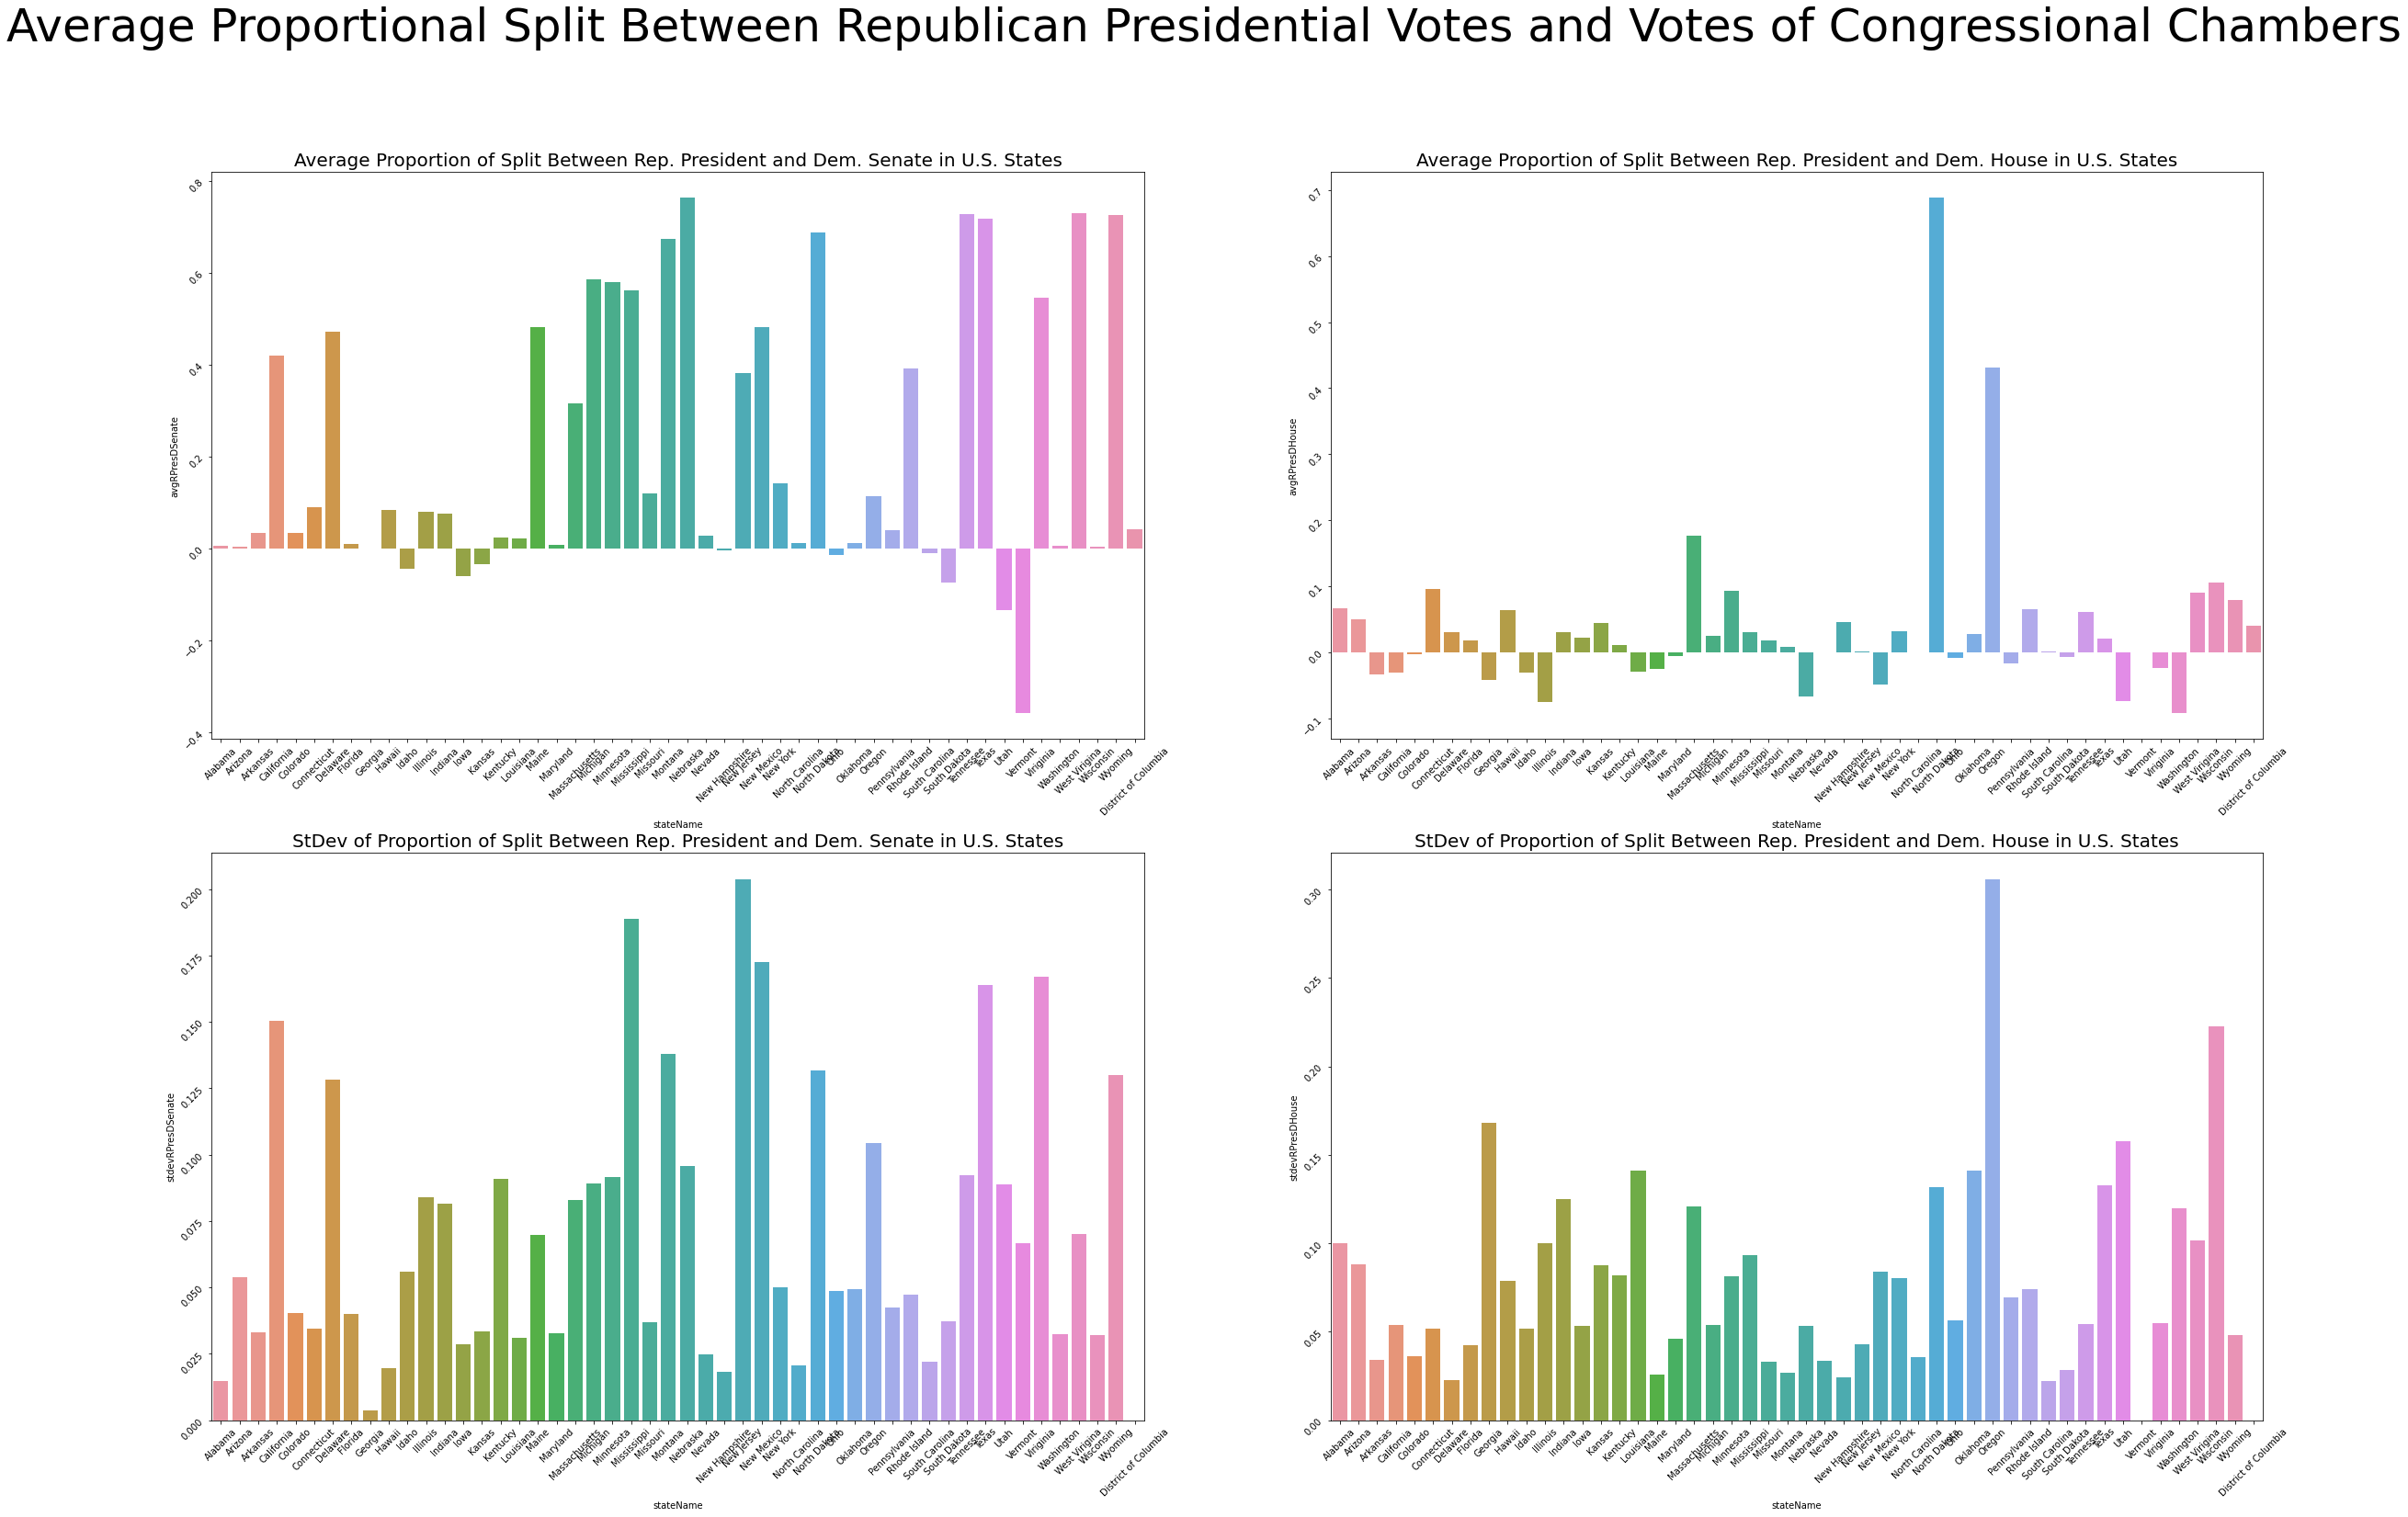

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(40, 25))

fig.suptitle('Average Proportional Split Between Republican Presidential Votes and Votes of Congressional Chambers', fontsize = 50)

sns.barplot(ax=axes[0, 0], x=portionSplitRPresDSenate["stateName"], y=portionSplitRPresDSenate["avgRPresDSenate"], data=portionSplitRPresDSenate[["stateName","avgRPresDSenate"]])
axes[0,0].set_title("Average Proportion of Split Between Rep. President and Dem. Senate in U.S. States", fontsize = 20)
axes[0,0].tick_params(labelrotation=45)
sns.barplot(ax=axes[1, 0], x=portionSplitRPresDSenate["stateName"], y=portionSplitRPresDSenate["stdevRPresDSenate"], data=portionSplitRPresDSenate)
axes[1,0].set_title("StDev of Proportion of Split Between Rep. President and Dem. Senate in U.S. States", fontsize = 20)
axes[1,0].tick_params(labelrotation=45)
sns.barplot(ax=axes[0, 1], x=portionSplitRPresDHouse["stateName"], y=portionSplitRPresDHouse["avgRPresDHouse"], data=portionSplitRPresDHouse[["stateName","avgRPresDHouse"]])
axes[0,1].set_title("Average Proportion of Split Between Rep. President and Dem. House in U.S. States", fontsize = 20)
axes[0,1].tick_params(labelrotation=45)
sns.barplot(ax=axes[1, 1], x=portionSplitRPresDHouse["stateName"], y=portionSplitRPresDHouse["stdevRPresDHouse"], data=portionSplitRPresDHouse)
axes[1,1].set_title("StDev of Proportion of Split Between Rep. President and Dem. House in U.S. States", fontsize = 20)
axes[1,1].tick_params(labelrotation=45)


plt.show()


<p>As you can see in the top left plot, the split between voters who voted for Republican presidential candidates and Democratic senatorial candidates was consistently positive. This means that more voters voted for Republican presidential candidates than Democratic senators. The most visable notable exception was Vermont which split in favor of the Democratic senatorial candidates. In the bottom left plot, you can see that there was a large range of standard deviations with New Hampshire having the highest standard deviation amoung counties for votes split between Republican presidential candidates and Democratic senatorial candidates.</p>
<p>Before I begin with the presidential/house split plots, I would like to note that the y axis scales are different. However, North Carolina's spike in the top right plot is on par with the splits noted between the presidency and the senate. This means that more North Carolinians voted for a Republican presidential candidate than Republican house candidates. We can also see that North Carolina's standard deviation of split among the counties is relatively similar to other states. This could be due to federal-cournt mandated redistricting of congressional districts that moved back the original primary elections in <a href='https://en.wikipedia.org/wiki/2016_United_States_House_of_Representatives_elections_in_North_Carolina'>North Carolina</a>.</p>
<p> The final note that I would like to make is about Oklahoma's seemingly high standard deviation for the split between Republican presidental and house candidates. It seems that a Democratic house candidate only broke 30% of the vote within one of <a href='https://en.wikipedia.org/wiki/2016_United_States_House_of_Representatives_elections_in_Oklahoma'>Oklahoma's 5 house districts</a>. This relatively-large concentration of Democratic voters in one area may help explain the standard deviation.</p>

<h2>Democratic Split:</h2>

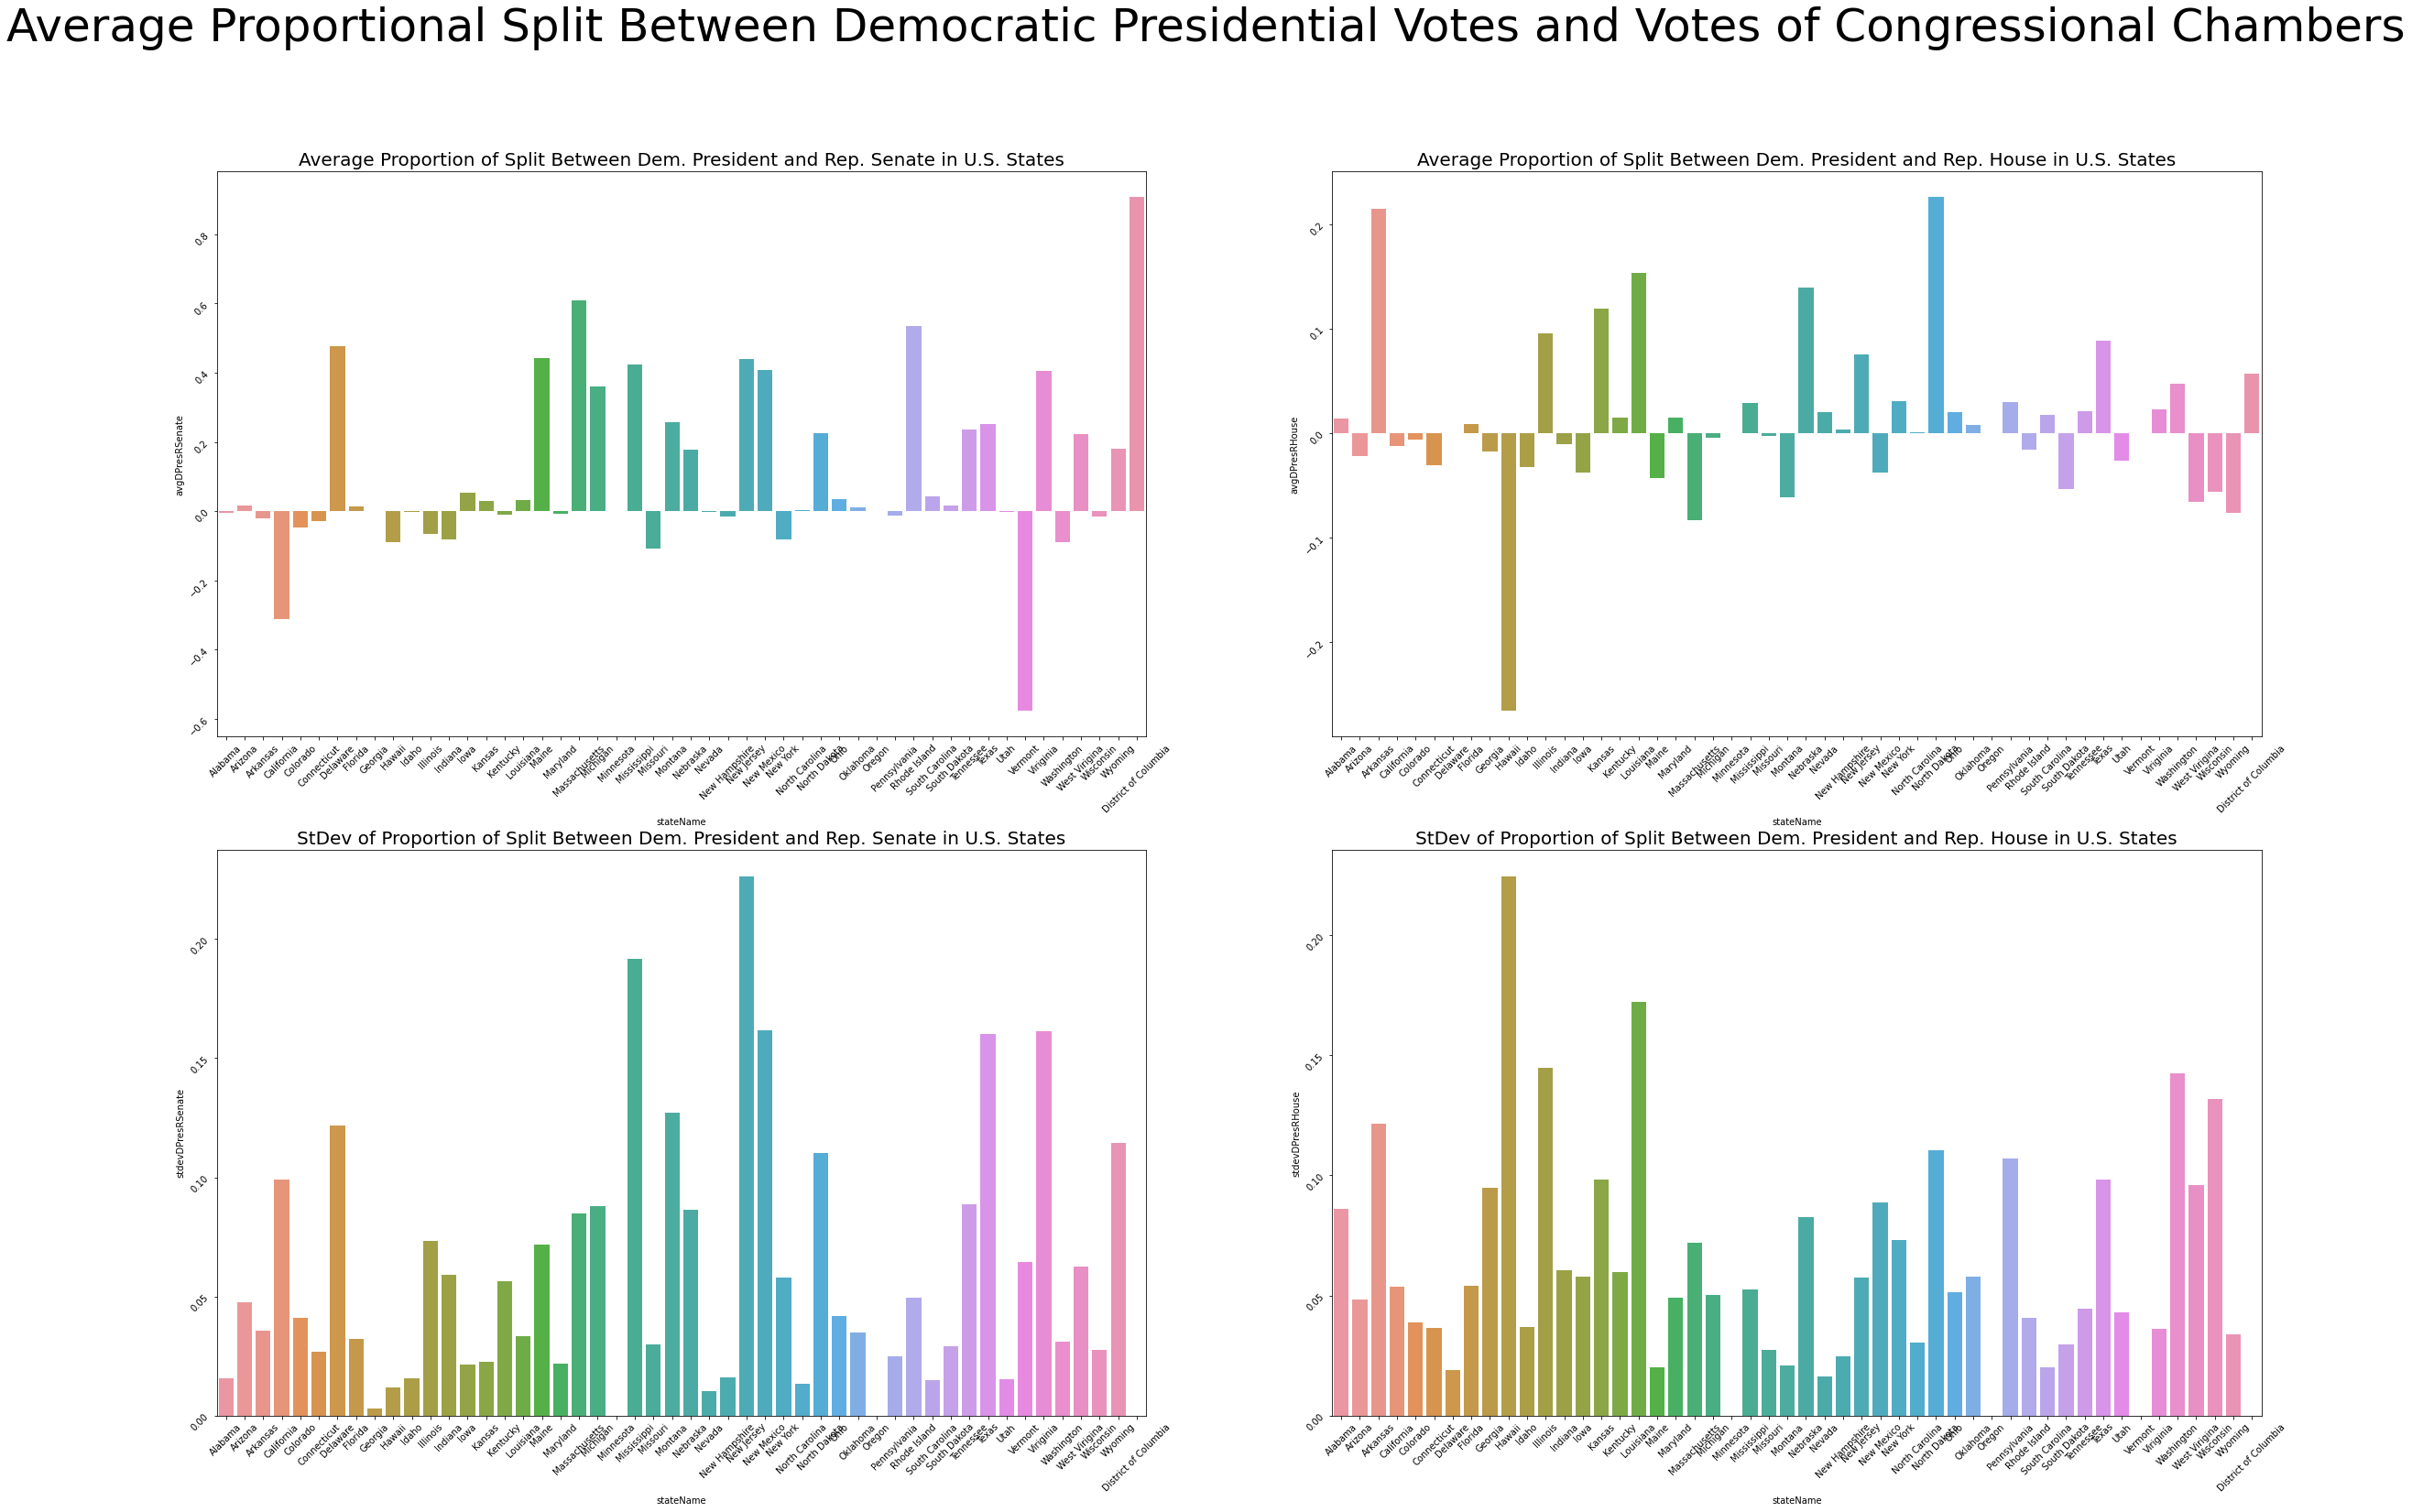

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(40, 25))

fig.suptitle('Average Proportional Split Between Democratic Presidential Votes and Votes of Congressional Chambers', fontsize = 50)

sns.barplot(ax=axes[0, 0], x=portionSplitDPresRSenate["stateName"], y=portionSplitDPresRSenate["avgDPresRSenate"], data=portionSplitDPresRSenate[["stateName","avgDPresRSenate"]])
axes[0,0].set_title("Average Proportion of Split Between Dem. President and Rep. Senate in U.S. States", fontsize = 20)
axes[0,0].tick_params(labelrotation=45)
sns.barplot(ax=axes[1, 0], x=portionSplitDPresRSenate["stateName"], y=portionSplitDPresRSenate["stdevDPresRSenate"], data=portionSplitDPresRSenate)
axes[1,0].set_title("StDev of Proportion of Split Between Dem. President and Rep. Senate in U.S. States", fontsize = 20)
axes[1,0].tick_params(labelrotation=45)
sns.barplot(ax=axes[0, 1], x=portionSplitDPresRHouse["stateName"], y=portionSplitDPresRHouse["avgDPresRHouse"], data=portionSplitDPresRHouse[["stateName","avgDPresRHouse"]])
axes[0,1].set_title("Average Proportion of Split Between Dem. President and Rep. House in U.S. States", fontsize = 20)
axes[0,1].tick_params(labelrotation=45)
sns.barplot(ax=axes[1, 1], x=portionSplitDPresRHouse["stateName"], y=portionSplitDPresRHouse["stdevDPresRHouse"], data=portionSplitDPresRHouse)
axes[1,1].set_title("StDev of Proportion of Split Between Dem. President and Rep. House in U.S. States", fontsize = 20)
axes[1,1].tick_params(labelrotation=45)


plt.show()

<h1>Which partisian leaning voter is less loyal to their party?</h1>
<p>In order to answer the thrid and final question, I needed to determine the diffence in average proportional split between voters who voted for a presidential candidate from either of the two main parties. </p>
<p>A note, in the code below you will see me utilize the "portionSplitDPresRSenate" DataFrame. I could have used either of the two senate data frames since the <b>"stateName"</b>s are the same in all of them, as is the <b>"avgDiffReptoDem"</b>. A positive <b>"avgDiffReptoDem"</b> value means that Republican candidates experienced a larger split than Democratic ones.</p>
<p>There are two main states in the below graph that stand out. The first is California where Republicans saw around a 0.7 larger differnce than Democrats did in voters who voted for Republican presidential candidates but not Republican senatorial candidates. The second is the District of Columbia. This large dip can be explained by the fact that neither of their senators who serve as <a href='https://en.wikipedia.org/wiki/Shadow_congressperson#District_of_Columbia_shadow_senators'>"Shadow congresspeople" </a>were up for re-election in 2016.


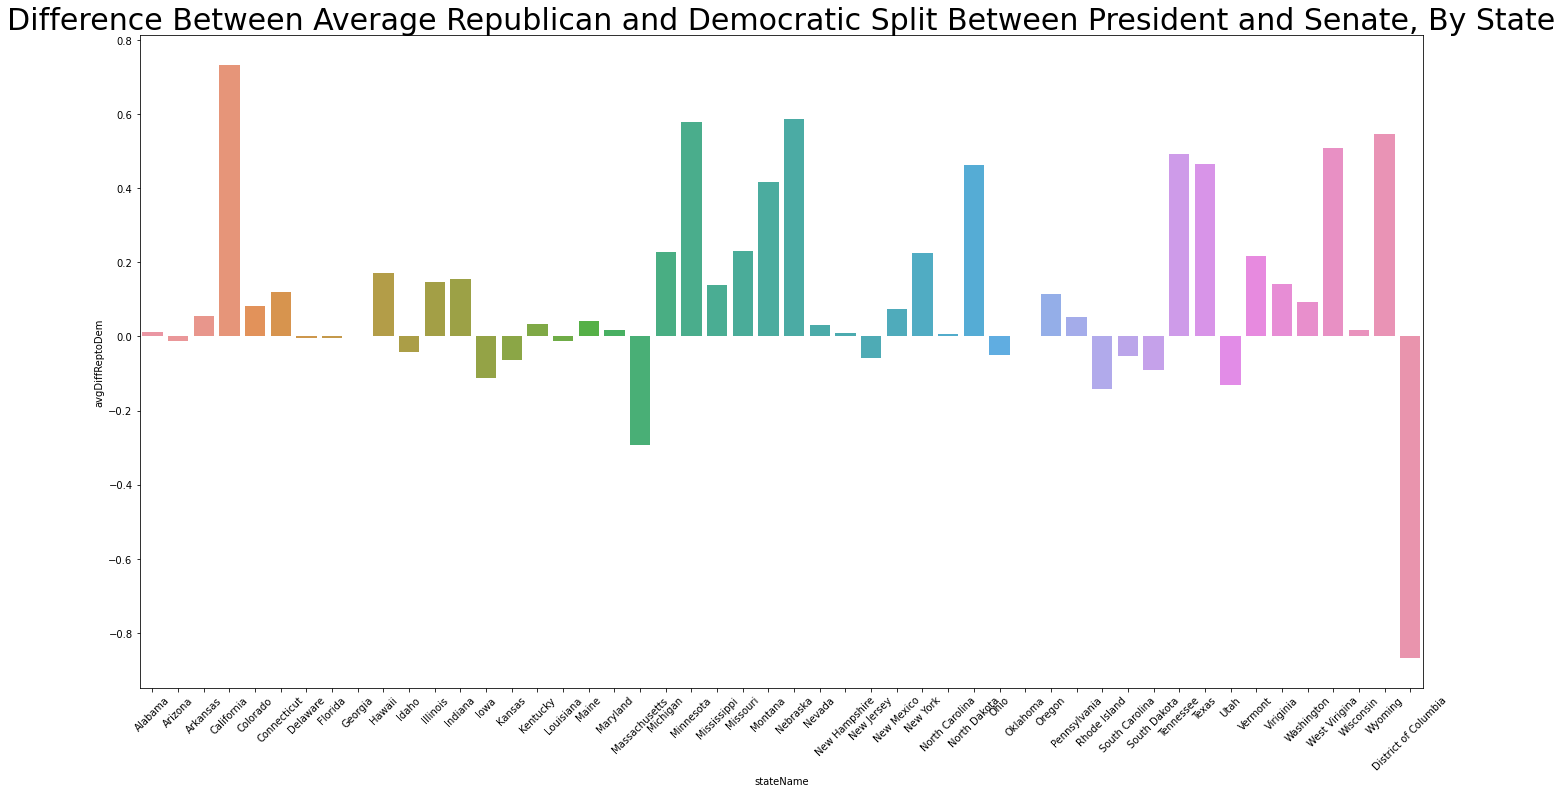

In [17]:
plt.figure(figsize=(23, 12))
sns.barplot(x=portionSplitDPresRSenate["stateName"], y=portionSplitDPresRSenate["avgDiffReptoDem"], data=portionSplitDPresRSenate)
plt.title("Difference Between Average Republican and Democratic Split Between President and Senate, By State", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

<h1>Conculding Thoughts</h1>
<p>In the future, I would hope to be able to figure out a way to use the local and state-level election datasets to see if split ticket voting is more common in local elections since a personal connection to the candidate is more likely. I would also like to find a way to use the Cook PVI scores to look for potential relationships between historical geographic partisianship and split ticket voting.Finally, I would like to go back and find a way to account for states where no senators were up for re-eleciton. This likely greatly impacted the data, and I would like to better understand how.</p>